# Pisa data 2012

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
#inporting neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import zipfile
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

### Obtaining the datasets

> ***There are two different file to download from the internet***
 - ***PISA 2012 .csv file***
 
 
 - ***PISA Data Dictionary***: The data and topics of investigation come from the PISA Data Visualization Competition. For inspiration and examples, see the winners and submissions here. If you want to know more about the survey design, the details can be found in this technical report.

> - **1. Pisa2012.csv file**

In [12]:
#downloading the data from udacity server
urllib.request.urlretrieve('https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip', filename = 'pisa2012.zip')

#extractingk the zip file downlowded
with zipfile.ZipFile('pisa2012.zip', 'r') as file:
    file.extractall()

In [13]:
df_raw = pd.read_csv('pisa2012.csv')
df_raw.shape

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Up\anaconda3\lib\site-packages\pandas\io\parsers.py", line 468, in _read
    return parser.read(nrows)
  File "C:\Users\Up\anaconda3\lib\site-packages\pandas\io\parsers.py", line 1057, in read
    index, columns, col_dict = self._engine.read(nrows)
  File "C:\Users\Up\anaconda3\lib\site-packages\pandas\io\parsers.py", line 2061, in read
    data = self._reader.read(nrows)
  File "pandas\_libs\parsers.pyx", line 756, in pandas._libs.parsers.TextReader.read
  File "pandas\_libs\parsers.pyx", line 799, in pandas._libs.parsers.TextReader._read_low_memory
  File "pandas\_libs\parsers.pyx", line 1983, in pandas._libs.parsers._concatenate_chunks
  File "<__array_function__ internals>", line 5, in concatenate
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Up\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec

TypeError: object of type 'NoneType' has no len()

In [ ]:
df_raw.head(2)

> - **2. PISA Data Dictionary**

In [ ]:
url = "https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv"
urllib.request.urlretrieve(url, filename='pisadict2012.csv')

In [14]:
df_dict = pd.read_csv('pisadict2012.csv')
df_dict.T

,0,1,2,3,4,5,6,7,8,9,...,625,626,627,628,629,630,631,632,633,634
Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
x,Country code 3-character,Adjudicated sub-region code 7-digit code (3-di...,Stratum ID 7-character (cnt + region ID + orig...,OECD country,National Centre 6-digit Code,School ID 7-digit (region ID + stratum ID + 3-...,Student ID,International Grade,National Study Programme,Birth - Month,...,FINAL STUDENT REPLICATE BRR-FAY WEIGHT75,FINAL STUDENT REPLICATE BRR-FAY WEIGHT76,FINAL STUDENT REPLICATE BRR-FAY WEIGHT77,FINAL STUDENT REPLICATE BRR-FAY WEIGHT78,FINAL STUDENT REPLICATE BRR-FAY WEIGHT79,FINAL STUDENT REPLICATE BRR-FAY WEIGHT80,RANDOMIZED FINAL VARIANCE STRATUM (1-80),RANDOMLY ASSIGNED VARIANCE UNIT,Senate weight - sum of weight within the count...,Date of the database creation


## The dataset

### Dataset Structure

The file provided for this study, pisa2012.csv, contains data from a total of 485'490 students grouped in 636 columns.

> The dataset contains not only the results from the exam in each category, but also lots of information on the students' background, including variables like country of residence, number of family members and their level of education, possessions or access to different facilities at home and school.

### Feature of interest

> The main feature of this dataset is the score obtained by the students in each discipline and the potential for understanding how a number of different factors can impact these scores and therefore the level of preparation for students around the world.

### Dataset simplification

Analyzing such a complex dataset entirely would require a lot of time. For this project, I simplify the dataset and keep only the variables that I intend to focus my investigation on. The variables are selected through a visual assessment in  of the pisadict2012.csv file.

I would like to know if any of the following factors have a significant impact on the test results:

- Student's country of residence.
- Student's country economic level (OECD or not).
- Student's gender.
- Student's parents' level of education.
- Access to internet at school and at home.
- Perseverance
- Age

In addition to the columns referring to these factors, I also keep the results of the test for mathematics, reading and science. For each of the three disciplines, I only use Plausible Value 1 (the dataset contains 5 Plausible values for each of them). 

The file pisadict2012.csv contains a dictionnary with all the column names and a description of the variable they represent. I use the column names from this file to create the simplified dataset, as follows.

In [15]:
df = df_raw[['STIDSTD', 'CNT', 'OECD', 'ST04Q01', "AGE", 'ST13Q01', "PERSEV",  'ST17Q01', 'IC01Q04', 'IC02Q04', 'PV1MATH', 'PV1READ', 'PV1SCIE']]
df.head()

NameError: name 'df_raw' is not defined

In [16]:
df.to_csv('pisa2012_raw.csv', index=False)

NameError: name 'df' is not defined

### Data Wrangling

The dataset is well organized but there are some improvements that would make its analysis a bit easier. I do the following changes to it:

- Rename the columns using more descriptive names.
- Replace education_mother and education_father values.
- Replace school_internet and home_internet values.
- Correct the datatype when appropiate.
- Add a column with the sum of the three test scores.

In [17]:
df = pd.read_csv('pisa2012_raw.csv')

In [18]:
#dulicate the dataset
df_clean = df.copy()

In [19]:
df_clean.head()

,student_id,country,oecd,gender,Student_age,education_mother,Perseverance,education_father,home_internet,school_internet,score_math,score_reading,score_science
0,1,Albania,Non-OECD,Female,16.17,<ISCED level 3A>,-0.3407,<ISCED level 3A>,NaN,NaN,406.8469,249.5762,341.7009
1,2,Albania,Non-OECD,Female,16.17,<ISCED level 3A>,1.3116,<ISCED level 3A>,NaN,NaN,486.1427,406.2936,548.9929
2,3,Albania,Non-OECD,Female,15.58,"<ISCED level 3B, 3C>",0.9918,<ISCED level 3A>,NaN,NaN,533.2684,401.2100,499.6643
3,4,Albania,Non-OECD,Female,15.67,"<ISCED level 3B, 3C>",NaN,<ISCED level 3A>,NaN,NaN,412.2215,547.3630,438.6796
4,5,Albania,Non-OECD,Female,15.50,She did not complete <ISCED level 1>,1.0819,"<ISCED level 3B, 3C>",NaN,NaN,381.9209,311.7707,361.5628


##### case 1

Renaming the columns

##### code

In [20]:
column_names = {'STIDSTD': 'student_id',
                'CNT': 'country',
                'OECD': 'oecd',
                'ST04Q01': 'gender',
                'ST13Q01': 'education_mother',
                'ST17Q01': 'education_father',
                'IC01Q04' : 'home_internet',
                'IC02Q04' : 'school_internet',
                'AGE' : "Student_age",
                'PERSEV' : 'Perseverance',
                'PV1MATH': 'score_math',
                'PV1READ': 'score_reading',
                'PV1SCIE': 'score_science'}
df_clean = df_clean.rename(columns = column_names)

##### test

In [21]:
df_clean.head()

,student_id,country,oecd,gender,Student_age,education_mother,Perseverance,education_father,home_internet,school_internet,score_math,score_reading,score_science
0,1,Albania,Non-OECD,Female,16.17,<ISCED level 3A>,-0.3407,<ISCED level 3A>,NaN,NaN,406.8469,249.5762,341.7009
1,2,Albania,Non-OECD,Female,16.17,<ISCED level 3A>,1.3116,<ISCED level 3A>,NaN,NaN,486.1427,406.2936,548.9929
2,3,Albania,Non-OECD,Female,15.58,"<ISCED level 3B, 3C>",0.9918,<ISCED level 3A>,NaN,NaN,533.2684,401.2100,499.6643
3,4,Albania,Non-OECD,Female,15.67,"<ISCED level 3B, 3C>",NaN,<ISCED level 3A>,NaN,NaN,412.2215,547.3630,438.6796
4,5,Albania,Non-OECD,Female,15.50,She did not complete <ISCED level 1>,1.0819,"<ISCED level 3B, 3C>",NaN,NaN,381.9209,311.7707,361.5628


##### case 2

Replacing education values

##### code

In [22]:
df_clean.education_mother.value_counts()

<ISCED level 3A>                         236993
<ISCED level 3B, 3C>                      83048
<ISCED level 2>                           82614
<ISCED level 1>                           36556
She did not complete <ISCED level 1>      18768
Name: education_mother, dtype: int64

In [23]:
df_clean.education_father.value_counts()

<ISCED level 3A>                        215280
<ISCED level 3B, 3C>                     91179
<ISCED level 2>                          84329
<ISCED level 1>                          35938
He did not complete <ISCED level 1>      16535
Name: education_father, dtype: int64

The highest level of education for parents in the PISA report are classified as follows:

'Students’ responses to questions ST005, ST006, ST007 and ST008 regarding their parents’ education were classified using ISCED 1997 (OECD, 1999[4]). Indices on parental education were constructed by recoding educational qualifications into the following categories: (0) None, (1) <ISCED level 1> (primary education), (2) <ISCED level 2> (lower secondary), (3) <ISCED level 3B or 3C> (vocational/pre-vocational upper secondary), (4) <ISCED level 3A> (general upper secondary) and/or <ISCED level 4> (non-tertiary post-secondary), (5) <ISCED level 5B> (vocational tertiary) and (6) <ISCED level 5A> and/or <ISCED level 6> (theoretically oriented tertiary and post-graduate). Indices with these categories were provided for a student’s mother (MISCED) and father (FISCED), and the index of highest education level of parents (HISCED) corresponded to the higher ISCED level of either parent.' Source: https://www.oecd-ilibrary.org/sites/0a428b07-en/index.html?itemId=/content/component/0a428b07-en

I then use the following four categories, in this order:

- 0, for not having completed primary education.
- 1, for ISCED level 1, corresponding to primary education.
- 2, for ISCED level 2, corresponding to lower secondary.
- 3, for ISCED levels 3A, 3B, 3C, corresponding to upper secondary.

In [24]:
df_clean.loc[df_clean['education_father'].str[-4:-3] == '3', 'education_father'] = 'Upper Secondary'
df_clean.loc[df_clean['education_father'].str[-3:-2] == '2', 'education_father'] = 'Lower Secondary'
df_clean.loc[df_clean['education_father'].str[:2] == 'He', 'education_father'] = 'No Education'

In [25]:
df_clean.loc[df_clean['education_father'].str[-3:-2] == '1', 'education_father'] = 'Primary'

In [26]:
df_clean.loc[df_clean['education_mother'].str[-4:-3] == '3', 'education_mother'] = 'Upper Secondary'
df_clean.loc[df_clean['education_mother'].str[-3:-2] == '2', 'education_mother'] = 'Lower Secondary'
df_clean.loc[df_clean['education_mother'].str[:2] == 'Sh', 'education_mother'] = 'No Education'

In [27]:
df_clean.loc[df['education_mother'].str[-3:-2] == '1', 'education_mother'] = 'Primary'

##### test

In [28]:
df_clean.education_father.value_counts()

Upper Secondary    306459
Lower Secondary     84329
Primary             35938
No Education        16535
Name: education_father, dtype: int64

In [29]:
df_clean.education_mother.value_counts()

Upper Secondary    320041
Lower Secondary     82614
Primary             55324
Name: education_mother, dtype: int64

##### case 3

Replacing the internet values

#### code

In [30]:
df_clean['home_internet'].value_counts()

Yes, and I use it          259762
No                          30161
Yes, but I don�t use it      7382
Name: home_internet, dtype: int64

In [31]:
df_clean['school_internet'].value_counts()

Yes, and I use it          197587
Yes, but I don�t use it     60613
No                          38744
Name: school_internet, dtype: int64

There are three different values in each of these two columns. For the purpose of this study, having internet at home or at school but not using it would be equivalent to not having internet, as I want to know whether the USE of internet has a positive impact on the test score. I then group the values as follows

In [32]:
internet_values = {'Yes, and I use it': 'Yes', 'Yes, but I don�t use it': 'No'}
df_clean['home_internet'] = df_clean['home_internet'].map(internet_values)
df_clean['school_internet'] = df_clean['school_internet'].map(internet_values)

##### test

In [33]:
df_clean['home_internet'].value_counts()

Yes    259762
No       7382
Name: home_internet, dtype: int64

In [34]:
df_clean['school_internet'].value_counts()

Yes    197587
No      60613
Name: school_internet, dtype: int64

In [35]:
#checking our datatypes
df_clean.head()

,student_id,country,oecd,gender,Student_age,education_mother,Perseverance,education_father,home_internet,school_internet,score_math,score_reading,score_science
0,1,Albania,Non-OECD,Female,16.17,Upper Secondary,-0.3407,Upper Secondary,NaN,NaN,406.8469,249.5762,341.7009
1,2,Albania,Non-OECD,Female,16.17,Upper Secondary,1.3116,Upper Secondary,NaN,NaN,486.1427,406.2936,548.9929
2,3,Albania,Non-OECD,Female,15.58,Upper Secondary,0.9918,Upper Secondary,NaN,NaN,533.2684,401.2100,499.6643
3,4,Albania,Non-OECD,Female,15.67,Upper Secondary,NaN,Upper Secondary,NaN,NaN,412.2215,547.3630,438.6796
4,5,Albania,Non-OECD,Female,15.50,Primary,1.0819,Upper Secondary,NaN,NaN,381.9209,311.7707,361.5628


##### case 4

Check the datatypes

##### code

In [36]:
df_clean.dtypes

student_id            int64
country              object
oecd                 object
gender               object
Student_age         float64
education_mother     object
Perseverance        float64
education_father     object
home_internet        object
school_internet      object
score_math          float64
score_reading       float64
score_science       float64
dtype: object

I would like to do the following corrections:

- country to category.
- gender to category.
- education_mother and education_father to category.
- home_internet and school_internet to category.
- oecd to boolean.

Convert the 6 columns to category datatype:

In [37]:
for col in ['country', 'gender', 'education_mother', 'education_father', 'home_internet', 'school_internet']:
    df_clean[col] = df_clean[col].astype('category')

In [38]:
df_clean.oecd.value_counts()

OECD        295416
Non-OECD    190074
Name: oecd, dtype: int64

Convert the 'oecd' column to boolean type.

In [39]:
oecd_values = {'OECD': True, 'Non-OECD': False}
df_clean['oecd'] = df_clean['oecd'].map(oecd_values)

In [40]:
df_clean.oecd.value_counts()

True     295416
False    190074
Name: oecd, dtype: int64

##### test

In [41]:
df_clean.dtypes

student_id             int64
country             category
oecd                    bool
gender              category
Student_age          float64
education_mother    category
Perseverance         float64
education_father    category
home_internet       category
school_internet     category
score_math           float64
score_reading        float64
score_science        float64
dtype: object

##### case 5

Add column with total score

##### code

In [42]:
df_clean['score_total'] = df_clean['score_math'] + df_clean['score_reading'] + df_clean['score_science']

##### test

In [43]:
df_clean.head()

,student_id,country,oecd,gender,Student_age,education_mother,Perseverance,education_father,home_internet,school_internet,score_math,score_reading,score_science,score_total
0,1,Albania,False,Female,16.17,Upper Secondary,-0.3407,Upper Secondary,NaN,NaN,406.8469,249.5762,341.7009,998.1240
1,2,Albania,False,Female,16.17,Upper Secondary,1.3116,Upper Secondary,NaN,NaN,486.1427,406.2936,548.9929,1441.4292
2,3,Albania,False,Female,15.58,Upper Secondary,0.9918,Upper Secondary,NaN,NaN,533.2684,401.2100,499.6643,1434.1427
3,4,Albania,False,Female,15.67,Upper Secondary,NaN,Upper Secondary,NaN,NaN,412.2215,547.3630,438.6796,1398.2641
4,5,Albania,False,Female,15.50,Primary,1.0819,Upper Secondary,NaN,NaN,381.9209,311.7707,361.5628,1055.2544


##### Expoxting the cleaned dataframe

In [44]:
df_clean.to_csv('pisa2012_clean.csv', index=False)

## 1. Univariate Exploration

In [45]:
df1 = pd.read_csv('pisa2012_clean.csv')
df1.head(2)

,student_id,country,oecd,gender,Student_age,education_mother,Perseverance,education_father,home_internet,school_internet,score_math,score_reading,score_science,score_total
0,1,Albania,False,Female,16.17,Upper Secondary,-0.3407,Upper Secondary,NaN,NaN,406.8469,249.5762,341.7009,998.1240
1,2,Albania,False,Female,16.17,Upper Secondary,1.3116,Upper Secondary,NaN,NaN,486.1427,406.2936,548.9929,1441.4292


### Question 1: What is the distribution of the scores?

In order to answer this question, I used histogram for each of the four scores. I know this could be considered a bivariate plot (faceted plot) for showing all histograms together. However, I'm more insterested in knowing the kind of distribution in each score variable than the comparison between disciplines itself. I'm just printing them together to simplify the process, so I keep this under Univariate exploration.

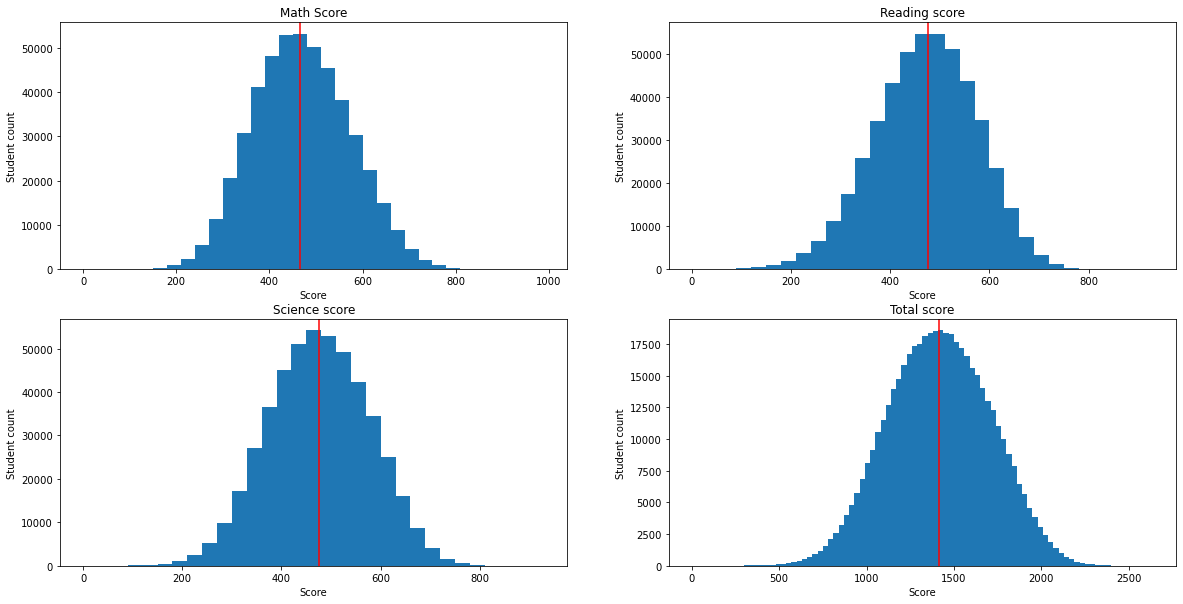

In [46]:
#set a large figure size for the subplots
plt.figure(figsize=[20, 10])

#set the bin
binsize = 30

# histogram on top-left, for math score
# 2 row, 2 cols, subplot 1
ax1 = plt.subplot(2, 2, 1) 
ax1_bin = np.arange(0, df1['score_math'].max()+binsize, binsize)
plt.hist(data = df1, x ='score_math', bins = ax1_bin)
plt.xlabel('Score')
plt.ylabel('Student count')
plt.axvline(x=df1.score_math.median(), color='r')
ax1.set_title("Math Score")

# histogram on top-right, for reading score
# 2 row, 2 cols, subplot 2
ax2 = plt.subplot(2, 2, 2) 
ax2_bin = np.arange(0, df1['score_reading'].max()+binsize, binsize)
plt.hist(data = df1, x ='score_reading', bins = ax2_bin)
plt.xlabel('Score')
plt.ylabel('Student count')
plt.axvline(x=df1.score_reading.median(), color='r')
ax2.set_title("Reading score")

# histogram on bottom-left, for science score
# 2 row, 2 cols, subplot 3
ax3 = plt.subplot(2, 2, 3) 
ax3_bin = np.arange(0, df1['score_science'].max()+binsize, binsize)
plt.hist(data = df1, x ='score_science', bins = ax3_bin)
plt.xlabel('Score')
plt.ylabel('Student count')
plt.axvline(x=df1.score_science.median(), color='r')
ax3.set_title("Science score")

# histogram on bottom-left, for total score
# 2 row, 2 cols, subplot 4
ax4 = plt.subplot(2, 2, 4) 
ax4_bin = np.arange(0, df1['score_total'].max()+binsize, binsize)
plt.hist(data = df1, x ='score_total', bins = ax4_bin)
plt.xlabel('Score')
plt.ylabel('Student count')
plt.axvline(x=df1.score_total.median(), color='r')
ax4.set_title("Total score")

#saving the picture
plt.savefig('images/fig01.jpg', bbox_inches='tight')    
plt.show();

**Q1, Observation**

From the visualization above, 
- we can deduce that the scores follows a clear normal distribution. 
- we could also deduce there may be a possibility that they use the same scoring system as the three scores fall between 200 - 800 points.
- The median for all 3 disciplines is also very similar, slightly below 500. 
- The similarity between the three plots could indicate that students performed equally well in all 3 disciplines (math, science and reading

### Question 2: What is the gender distribution of the tested population?

In order to answer this question, I used pie chart to display the gender count based on percentage

Female    245064
Male      240426
Name: gender, dtype: int64

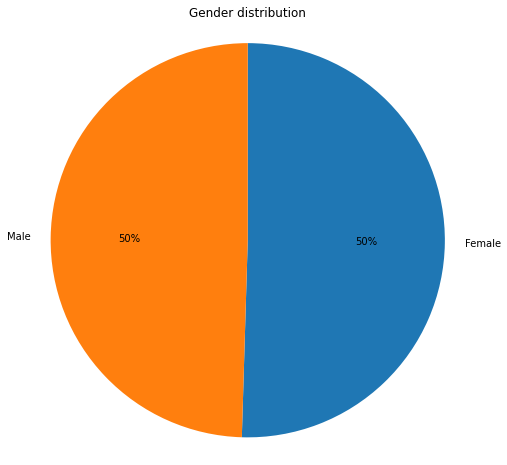

In [47]:
#getting the label counts for each gender
gender_counts = df1.gender.value_counts()
display(gender_counts)

#drawing the pie chart
plt.figure(figsize = [8,8])
plt.pie(gender_counts, labels=gender_counts.index, startangle=90, counterclock=False, autopct='%1.0f%%')
plt.title('Gender distribution')
plt.axis('square')
plt.savefig('images/fig2.jpg', bbox_inches='tight')
plt.show()

**Q2, Observation**

The visualization above shows that the distribution of gender for the tested population is equal for both male and female

### Question 3: What is the proportion of countries represented?

To solve this problem, I used ordered bar chart showing from highest to the lowest count.

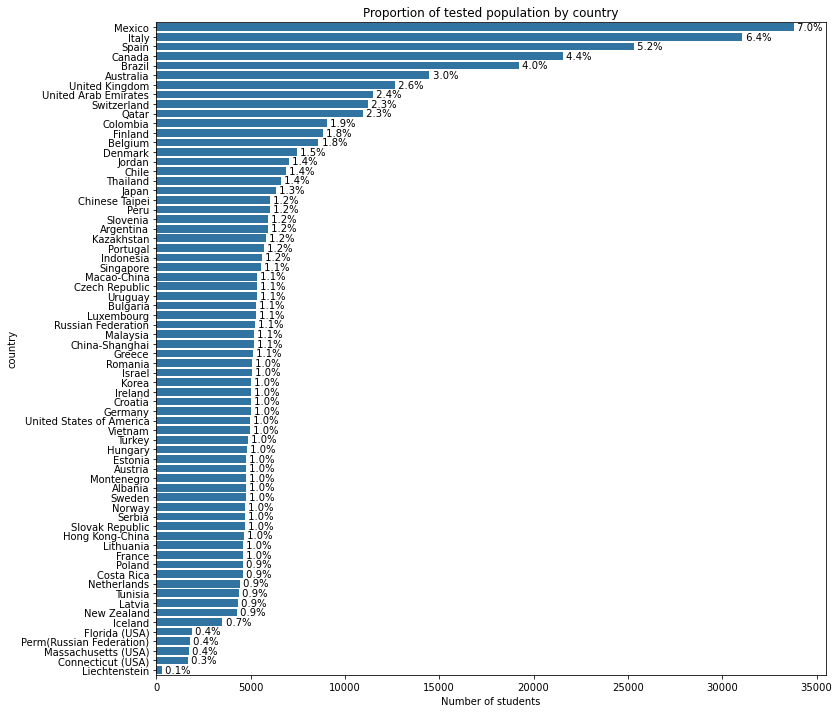

In [48]:
#setting a single colour for all bars 
base_color = sns.color_palette()[0]

#define proportions
country_counts = df1.country.value_counts()
no_student = country_counts.sum()

#defining the figure and drawing the plot
plt.figure(figsize=[12,12])
country_labels = country_counts.index
sns.countplot(data = df1, y = 'country', color=base_color, order=country_labels)
plt.title('Proportion of tested population by country')
plt.xlabel('Number of students')
plt.savefig('images/fig3.png', bbox_inches='tight')

# print the proportion text on the bars
for i in range (country_counts.shape[0]):
    count = country_counts[i]
    pct_string = ' {:0.1f}%'.format(count*100/no_student)
    plt.text(count+1, i, pct_string, va='center')

**Q3, observation**

The visualization above shows that:
- Not all the countries are equally represented
- Mexico leads the count with nearly 35000 students and Liechtenstein is the least represented country with less than 1000

### Question 4: What is the distribution of the age?

For this problem, i will use an histogram to solve clearify it

In [49]:
df1['Student_age'].min()

15.17

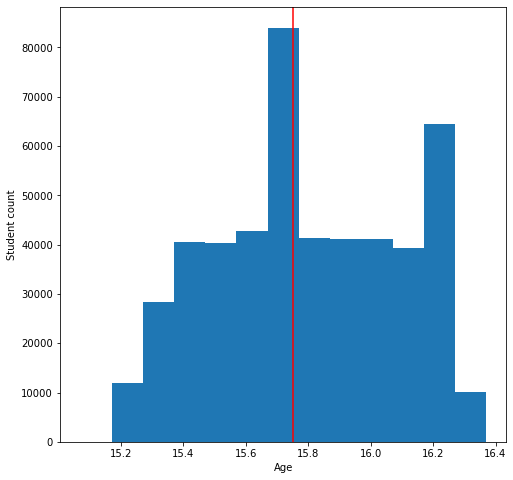

In [50]:
#set a large figure size for the subplots
plt.figure(figsize=[8, 8])

#set the bin
binsize = 0.1

# histogram on top-left, for math score
ax1_bin = np.arange(df1['Student_age'].min()-binsize, df1['Student_age'].max()+binsize, binsize)
plt.hist(data = df1, x ='Student_age', bins = ax1_bin)
plt.xlabel('Age')
plt.ylabel('Student count')
plt.axvline(x=df1.Student_age.median(), color='r')
ax1.set_title("Age against student count")
plt.savefig('images/fig4.png', bbox_inches='tight')

**Q4, observation**

The visualization above shows that:
- The age has a bimodal distribution which means that the the age has two modes 
- The age of the student tested is mainly between 15 -16.5 years, they are mainly teenagers

### Question 6: What proportion of the countries belongs to OECD countries?

For the problem above, i used pie chart to visulaize the solution

False    34
True     34
Name: oecd, dtype: int64

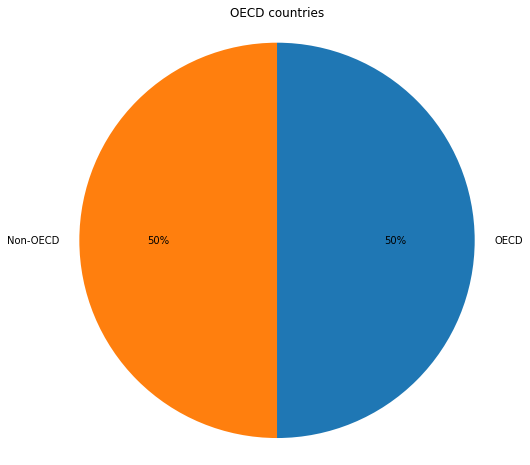

In [51]:
# determine the country count for OECD and non-OECD
country_counts = df1.groupby('country')['oecd'].min().value_counts()
display(country_counts)

#drawing the pie chart
plt.figure(figsize=[8,8])
plt.pie(country_counts, labels= ['OECD', 'Non-OECD'], startangle=90, counterclock=False, autopct='%1.0f%%')
plt.title('OECD countries')
plt.axis('square')
plt.savefig('images/fig6.png', bbox_inches='tight')

**Q5, observation**

The visualization above shows that
- There are 64 countries represented in the dataset
- Exactly half of the countries are OECD countries

### Question 6: What proportion of the tested students belongs to OECD countries?

I use another pie chart to show the distribution of students in OECD/non-OECD countries.

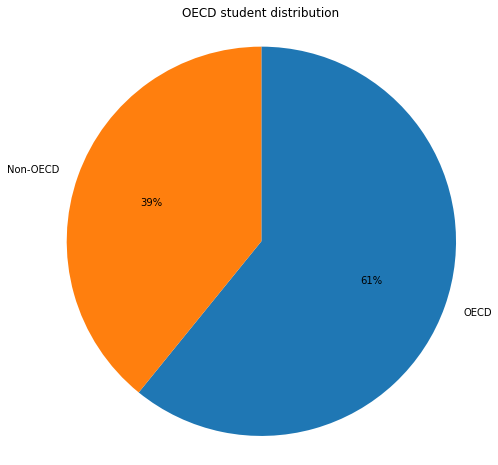

In [52]:
#Getting the student count for the OECD countries
oecd_student_counts = df1.oecd.value_counts()

#drawing the pie chart
plt.figure(figsize=[8,8])
plt.pie(oecd_student_counts, labels= ['OECD', 'Non-OECD'], startangle=90, counterclock=False, autopct='%1.0f%%')
plt.title('OECD student distribution')
plt.axis('square')
plt.savefig('images/fig6.png', bbox_inches='tight')

**Q6, observation**

The visualization above shows that
- Even though half of the countries represented are OECD countries, its not same for the students tested
- There's a significant difference in their representation, as students from OECD countries represent 61% of the total tested population as opposed to 39% from non-OECD countries.

### Univariate Exploration Summary

I looked at different variables in the Univariate Exploration section:

Q1: Score variables. The score variables is one of the quantitative variables in the analyzed dataset. As we could see in the first histograms, they all follow a normal distribution, without anything unusual. No transformations were needed to observe this.

Q2: Gender. A categorical variable containing 2 different values. I wasn't expecting such an equal distribution between genders. I'll further explore this in the Bivariate section to see if this 50/50 distribution also applies to each country individually.

Q3: Country. A categorical variable containing 68 different values. I was expecting to see a more even distribution between represented countries, but I cannot say there was anything unusual on it either. No transformations were needed here either.

Q4: Age. The Age variable is also one of the quantitative variablws in the dataset. we could see form the visulaization that there are two modes in the dataset and the students tested are mainly teenagers between the age of 15 and 17 years

Q5+Q6: OECD. Another categorical variable. In the first question I had to group the dataset by country, and for the other question I could just count the rows for each value.

## 2. Bivariate Exploration

i will first start with looking at the comparison between the variables i have not looked upon (i.e the education_mother, education_father, home_internet, school_internet) because i want to compare them in pairs

### Question 7: Comparing the education levels of each parents?

In order to answer this question, i made use of faceted bar chart which will allow me to view them side by size and make neccessary comparison.

In [53]:
# education types
education = ['Upper Secondary', 'Lower Secondary', 'Primary', 'No Education']

# return the types for education with the categories and orderedness
education_levels = pd.api.types.CategoricalDtype(ordered=True, categories=education)

# convert the education columns into an ordered categorical type 
df1['education_father'] = df1['education_father'].astype(education_levels)
df1['education_mother'] = df1['education_mother'].astype(education_levels)
df1.dtypes

student_id             int64
country               object
oecd                    bool
gender                object
Student_age          float64
education_mother    category
Perseverance         float64
education_father    category
home_internet         object
school_internet       object
score_math           float64
score_reading        float64
score_science        float64
score_total          float64
dtype: object

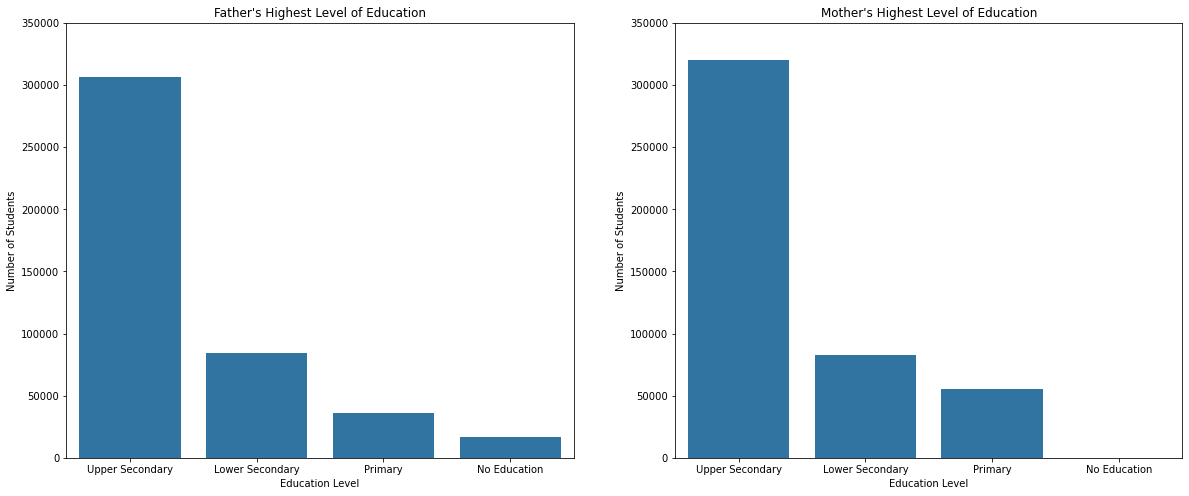

In [54]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 8])

# histogram on the left, for father's education
# 1 row, 2 cols, subplot 1
ax1 = plt.subplot(1, 2, 1) 
sns.countplot(data=df1, x='education_father', color=base_color)
plt.xlabel('Education Level');
plt.ylabel('Number of Students')
ax1.set_title("Father's Highest Level of Education")

# histogram on the right, for mother's education
# 1 row, 2 cols, subplot 2
ax2 = plt.subplot(1, 2, 2) 
sns.countplot(data=df1, x='education_mother', color=base_color)
plt.xlabel('Education Level')
plt.ylabel('Number of Students')
ax2.set_title("Mother's Highest Level of Education")

# set the same axis ranges for both charts
ax1.set_ylim([0, 350000])
ax2.set_ylim([0, 350000])

plt.savefig('images/fig7.png', bbox_inches='tight');

**Q7, obseravation**

From the visualization above, we can deduce that
- There is a clear difference in the educational levels of the fathers from the mothers. 
- The mothers are more educated than the fathers with every mother having at least a primary education compared with the father
- The majority of the students' parents have achieved at least an upper secondary education degree, but it'd be interesting to know how many of them achieved higher education degrees (university, masters, phd and so on)

### Question 8: Comparing the Intenet at home and at school?

I also used a facted bar chart to solve this problem

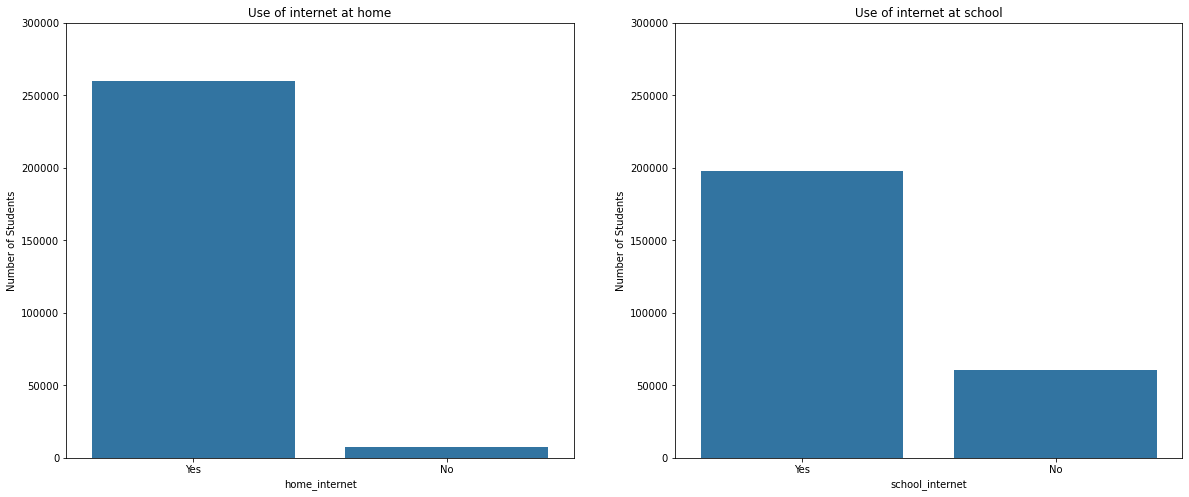

In [55]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 8])

# histogram on the left, for home internet use
# 1 row, 2 cols, subplot 1
ax1 = plt.subplot(1, 2, 1) 
sns.countplot(data=df1, x='home_internet', color=base_color)
plt.ylabel('Number of Students')
ax1.set_title("Use of internet at home");

# histogram on the right, for school internet use
# 1 row, 2 cols, subplot 2
ax2 = plt.subplot(1, 2, 2) 
sns.countplot(data=df1, x='school_internet', color=base_color)
plt.ylabel('Number of Students')
ax2.set_title("Use of internet at school");

# set the same axis ranges for both charts for better comparison
ax1.set_ylim([0, 300000])
ax2.set_ylim([0, 300000])

plt.savefig('images/fig8.jpg', bbox_inches='tight');

**Q8, observation**

- While the vast majority have access and use internet at home, there's still an important number of students who don't use internet at schools.

### Question 9: Relationship among the scores in each discipline?

I use a faceted scatterplot to compare the disciplines 2 by 2 and see if higher scores in one of them generally present higher scores on the other two.

There are 3 disciplines and in order to accomodate all 2 by 2, we need three graphs calculated as 3! / 2 which is 3

The dataset is very large so i want to sample 20000 students

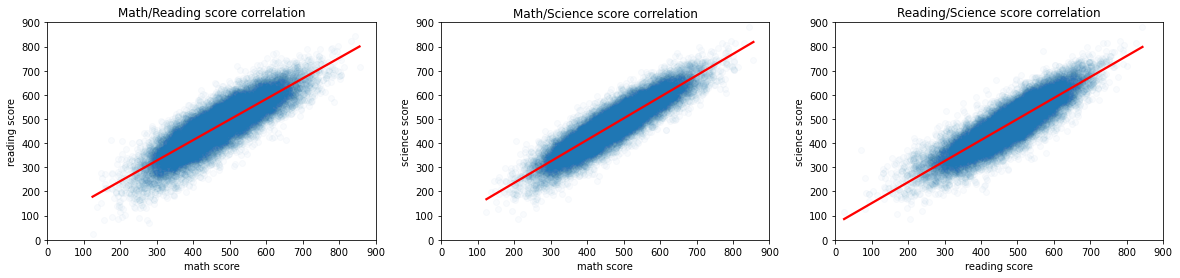

In [56]:
# create the sample
df_sample = df1.sample(20000)

# define figure size for subplots
plt.figure(figsize = [20, 4])

# histogram on the left
# 1 row, 3 cols, subplot 1
ax1 = plt.subplot(1, 3, 1) 
sns.regplot(data = df_sample, x = 'score_math', y = 'score_reading', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('math score')
plt.ylabel('reading score')
ax1.set_title("Math/Reading score correlation")

# histogram in the middle
# 1 row, 3 cols, subplot 2
ax2 = plt.subplot(1, 3, 2) 
sns.regplot(data = df_sample, x = 'score_math', y = 'score_science', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('math score')
plt.ylabel('science score')
ax2.set_title("Math/Science score correlation")

# histogram on the right
# 1 row, 3 cols, subplot 3
ax3 = plt.subplot(1, 3, 3) 
sns.regplot(data = df_sample, x = 'score_reading', y = 'score_science', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('reading score')
plt.ylabel('science score')
ax3.set_title("Reading/Science score correlation")

# set the same axis ranges for both charts
plots = [ax1, ax2, ax3]
for ax in plots:
    ax.set_xlim([0, 900])
    ax.set_ylim([0, 900])
    
plt.savefig('images/fig9.jpg', bbox_inches='tight');

**Q9, observation**

From the visulaization above we could deduce that
- The three of them have a pretty solid positive correlation
- This positive correlation indicates that students who perform better in one of the disciplines tend to perform equally well in the other two

### Question 10: Does one gender perform better than the other in any of the disciplines?

For this question, i made use of faceted box plot to solve the problem to compare gender and score

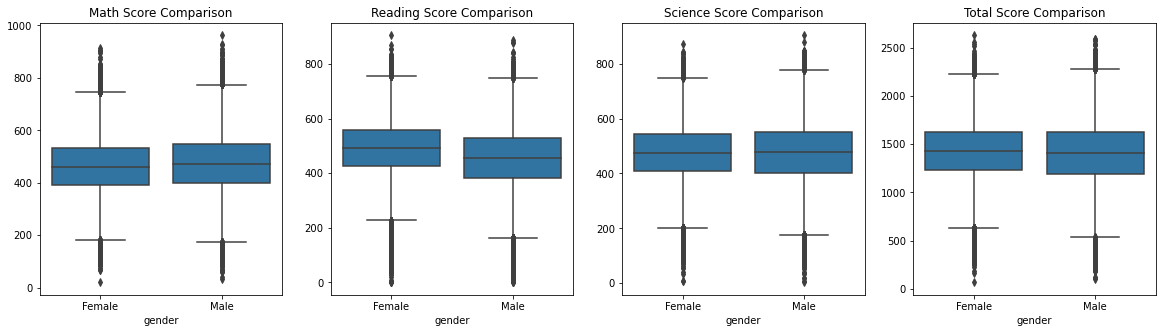

In [57]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 5])

# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.boxplot(data=df1, x='gender', y='score_math', color=base_color)
ax1.set_title("Math Score Comparison");

# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.boxplot(data=df1, x='gender', y='score_reading', color=base_color)
ax2.set_title("Reading Score Comparison");

# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.boxplot(data=df1, x='gender', y='score_science', color=base_color)
ax3.set_title("Science Score Comparison");

# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.boxplot(data=df1, x='gender', y='score_total', color=base_color)
ax4.set_title("Total Score Comparison");

# remove y-labels to avoid redundancy
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set_ylabel(None)
    
plt.savefig('images/fig10.jpg', bbox_inches='tight');

**Q10, observation**

The visualization above shows that
- while the gender distribution between the male and the female is equal. 
- There is a slightly better performance from the females in the Reading 
- The male performed slightly better in the math aspect
- For science, both genders present equivalent results, despite male students having a larger interquartile range, but this isn't indicative of a better or worse performance.

### Question 11:Score comparison between OECD / non-OECD countries

Here I look at the impact of the country category on the different test scores. I illustrate it with a series of violin plots.

I'm not looking at internet use at home since we saw in the Univariate Exploration that most students used internet at home, as opposed to school use.

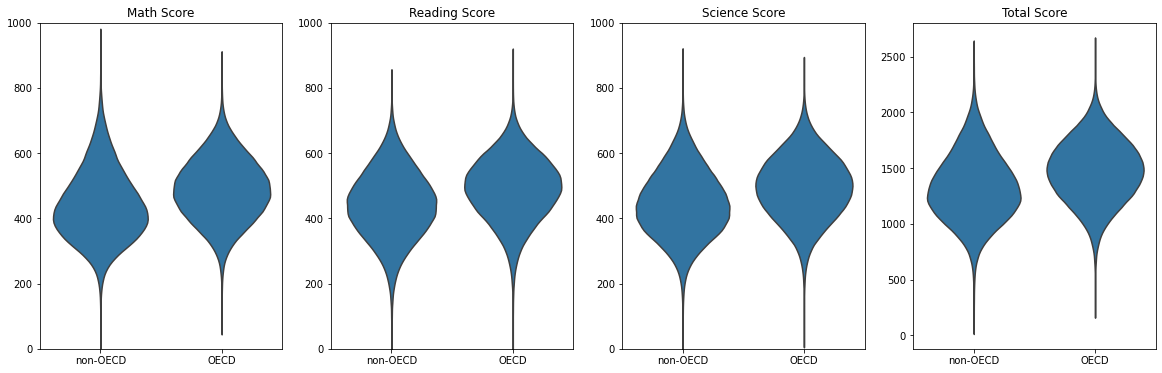

In [58]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 6])

# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.violinplot(data=df1, x='oecd', y='score_math', color=base_color, inner=None)
ax1.set_title("Math Score");

# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.violinplot(data=df1, x='oecd', y='score_reading', color=base_color, inner=None)
ax2.set_title("Reading Score");

# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.violinplot(data=df1, x='oecd', y='score_science', color=base_color, inner=None)
ax3.set_title("Science Score");

# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.violinplot(data=df1, x='oecd', y='score_total', color=base_color, inner=None)
ax4.set_title("Total Score")

# remove axis names and rename x-ticklabels
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set_xticklabels(('non-OECD', 'OECD'))
    ax.set(xlabel=None, ylabel=None)
    
plots2 = [ax1, ax2, ax3]
for ax in plots2:
    ax.set_ylim([0, 1000])
    
plt.savefig('images/fig11.jpg', bbox_inches='tight');

**Q11, observation**

From the visualization above, we can deduce that 
- It's very clear on all 4 violin plots that OECD country students obtain a higher score than students from non-OECD countries.

### Question 12: Score comparison based on internet use at school

Here I look at the impact of the internet use at school category on the different test scores. I illustrate it with a series of violin plots.

I'm not looking at internet use at home since we saw in the Univariate Exploration that most students used internet at home, as opposed to school use.

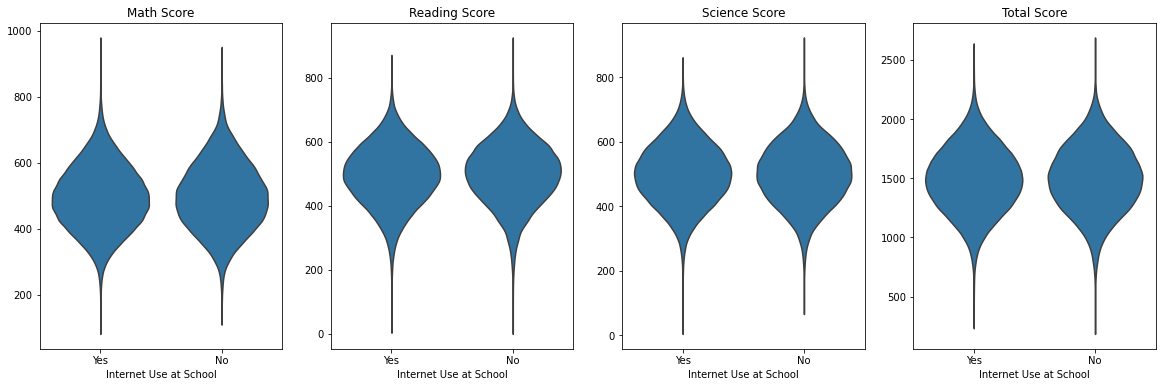

In [59]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 6])

# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.violinplot(data=df1, x='school_internet', y='score_math', color=base_color, inner=None)
ax1.set_title("Math Score")

# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.violinplot(data=df1, x='school_internet', y='score_reading', color=base_color, inner=None)
ax2.set_title("Reading Score")

# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.violinplot(data=df1, x='school_internet', y='score_science', color=base_color, inner=None)
ax3.set_title("Science Score")

# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.violinplot(data=df1, x='school_internet', y='score_total', color=base_color, inner=None)
ax4.set_title("Total Score")

# remove axis names and rename x-ticklabels
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set(xlabel="Internet Use at School", ylabel=None)
    
plt.savefig('images/fig12.jpg', bbox_inches='tight');

**Q12, observation**

From the visualization above, we can deduce that 
- There is no clear difference in the scores obtained in any of the disciplines between students who use and who don't use internet at school.

### Question 13: Score comparison based on parent's education level

The last question addressed in the Bivariate exploration section tries to understand if the parents' highest achieved level of education has an impact on the student's score. I use another violin plot for this.

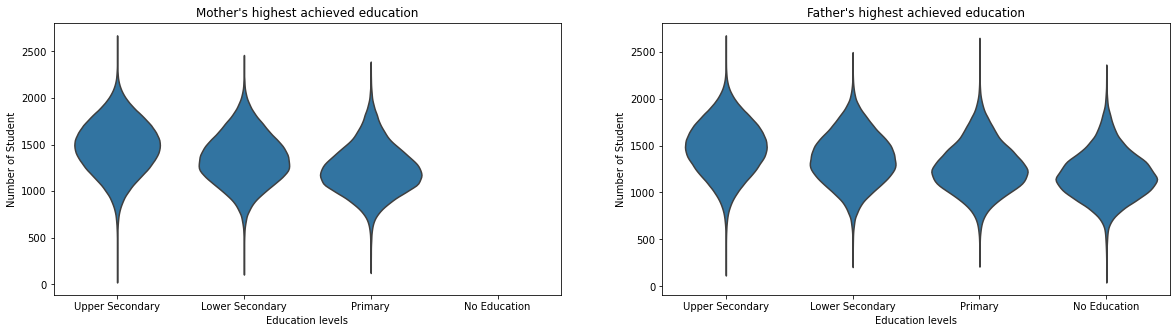

In [60]:
# figure size
plt.figure(figsize = [20, 5])

# plot
ax1 = plt.subplot(1,2,1)
ax1 = sns.violinplot(data=df1, x='education_mother', y='score_total', color=base_color, inner=None)
ax1.set_title("Mother\'s highest achieved education");
ax1.set(ylabel="Mother\'s highest achieved education", xlabel=None)


ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(data=df1, x='education_father', y='score_total', color=base_color, inner=None)
ax2.set_title("Father\'s highest achieved education");
ax2.set(ylabel="Father\'s highest achieved education", xlabel=None)

# remove axis names and rename x-ticklabels
plots = [ax1, ax2]
for ax in plots:
    ax.set(ylabel="Number of Student", xlabel='Education levels')

plt.savefig('images/fig13.jpg', bbox_inches='tight');

**Q14, observations**


From the visualization above, we can deduce  that
- We can see again a high impact from the parent's level of education on the total score obtained by the students. 
- The students whose mother has an education level equal or higher than Upper Secondary School obtain better scores than those whose mother's achieved education is lower.
- The students whose father has an education level equal or higher than Upper Secondary School obtain better scores than those whose father's achieved education is lower.

### Question 15: Score comparison based on Age

I solved this problem using faceted scatterplot

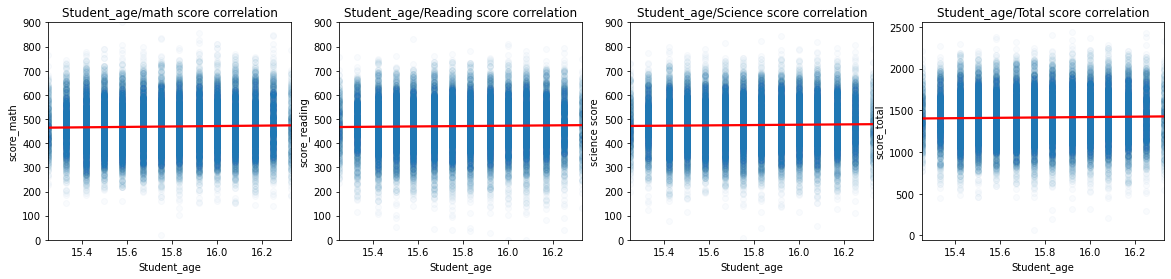

In [61]:
# create the sample
df_sample = df1.sample(20000)

# define figure size for subplots
plt.figure(figsize = [20, 4])

# histogram on the left
# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.regplot(data = df_sample, x = 'Student_age', y = 'score_math', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('Student_age')
plt.ylabel('score_math')
ax1.set_title("Student_age/math score correlation")

# histogram in the middle
# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.regplot(data = df_sample, x = 'Student_age', y = 'score_reading', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('Student_age')
plt.ylabel('score_reading')
ax2.set_title("Student_age/Reading score correlation")

# histogram on the right
# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.regplot(data = df_sample, x = 'Student_age', y = 'score_science', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('Student_age')
plt.ylabel('science score')
ax3.set_title("Student_age/Science score correlation")

# histogram on the right
# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.regplot(data = df_sample, x = 'Student_age', y = 'score_total', scatter_kws={'alpha':1/40}, line_kws={"color": "red"});
plt.xlabel('Student_age')
plt.ylabel('score_total')
ax4.set_title("Student_age/Total score correlation")

# set the same axis ranges for both charts
plots = [ax1, ax2, ax3]
for ax in plots:
    ax.set_ylim([0, 900])
    
plt.savefig('images/fig15.jpg', bbox_inches='tight');

**Q15, observation**

from the visualization above, we can deduce that
- The student age have a slight positive correlation with the scores all together. 

### Question 16: Score comparison based on Student perseverance

I solved this problem using faceted scatterplot

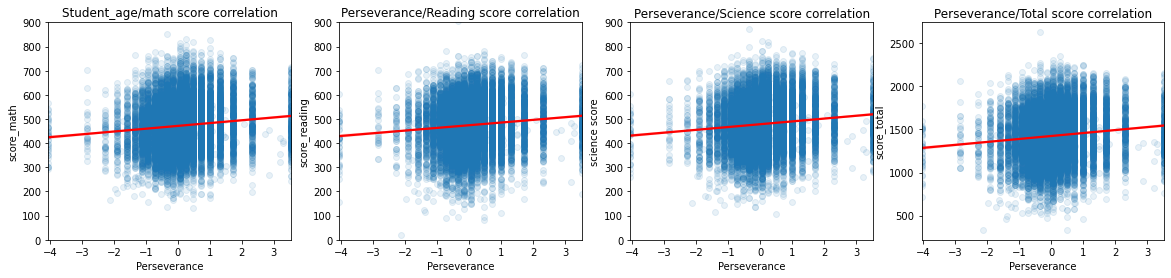

In [62]:
# create the sample
df_sample = df1.sample(20000)

# define figure size for subplots
plt.figure(figsize = [20, 4])

# histogram on the left
# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.regplot(data = df_sample, x = 'Perseverance', y = 'score_math', scatter_kws={'alpha':1/10}, line_kws={"color": "red"});
plt.xlabel('Perseverance')
plt.ylabel('score_math')
ax1.set_title("Student_age/math score correlation")

# histogram in the middle
# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.regplot(data = df_sample, x = 'Perseverance', y = 'score_reading', scatter_kws={'alpha':1/10}, line_kws={"color": "red"});
plt.xlabel('Perseverance')
plt.ylabel('score_reading')
ax2.set_title("Perseverance/Reading score correlation")

# histogram on the right
# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.regplot(data = df_sample, x = 'Perseverance', y = 'score_science', scatter_kws={'alpha':1/10}, line_kws={"color": "red"});
plt.xlabel('Perseverance')
plt.ylabel('science score')
ax3.set_title("Perseverance/Science score correlation")

# histogram on the right
# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.regplot(data = df_sample, x = 'Perseverance', y = 'score_total', scatter_kws={'alpha':1/10}, line_kws={"color": "red"});
plt.xlabel('Perseverance')
plt.ylabel('score_total')
ax4.set_title("Perseverance/Total score correlation")

# set the same axis ranges for both charts
plots = [ax1, ax2, ax3]
for ax in plots:
    ax.set_ylim([0, 900])
    
plt.savefig('images/fig16.jpg', bbox_inches='tight');

**Q16, observation**

From the visualization above, we can deduce that
- There is a clear positive correlation between perserverance and sutdent score in all the disciplines
- The more the student is able to persevere, the more the student score
- The majority of the students have a perseverance level between -1 and 1

### Bivariate Exploration Summary

The feature of interest of this dataset is the score obtained by the students in the PISA survey, divided into 4 different categories, 3 for the different disciplines and 1 for the total score (sum of the 3 disciplines).

I compare the performance of the students in the survey (scores), with some of the categorical variables referring to the student's background, such as their parent's level of education, the student's gender, the student's country being part or not of OECD, the use of internet, the student age and perseverance at their schools.

I compare the performance of the students in the survey (scores), with some of the categorical variables referring to the student's background, such as their parent's level of education, the student's gender, the student's country being part or not of OECD, and the use of internet at their schools.

Two of these categorical variables, gender and use of internet at schools, don't really shown a very clear impact on the student's scores. While female students seem to do better in reading, there isn't really much difference in the other two disciplines and the total score variables.

The other two categories, their parents' level of education and their country being or not part of OECD, have a clearer impact on the students' performance. Higher levels of education from their parents imply a higher result. Similarly, students from OECD countries show better performance.

I compared score with the student age and like the Perserverance level of the students. Though the age shows a slight positive correlation, the perserverance feature or variable shows a very clear positive correlation



## 3. Multivariate Exploration

### Question 17: From the two variables observed as having a more significant relation to the score, parent's education and OECD membership, which one is more pronounced?

I compare here three variables together (parent's education, OECD and score) to see if one of the two categorical variables has a more significant impact on the feature of interest.

I then use a seaborn stripplot with Jitter and Transparency, for parent's education and score, and different colours for the OECD variable.

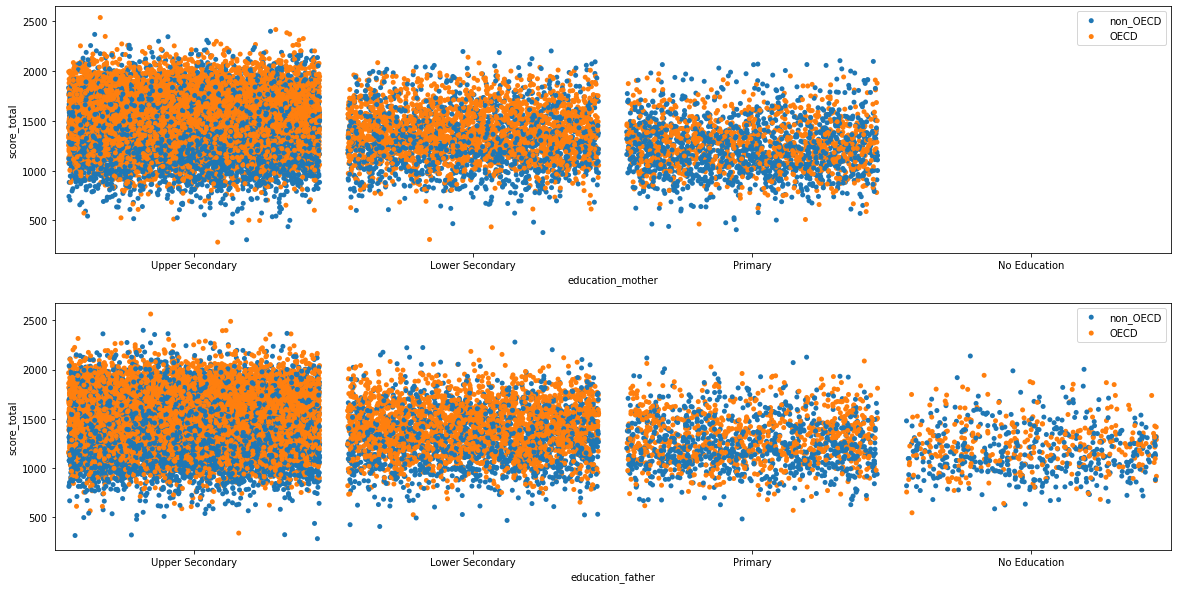

In [63]:
# filter out the rows not having education_mother values
multi_1 = df1[df1['education_mother'].notnull()]
multi_2 = df1[df1['education_father'].notnull()]

# create a sample
df2 = multi_1.sample(20000)
df3 = multi_2.sample(20000)

# plot
plt.figure(figsize = [20, 10])

ax1 = plt.subplot(2,1,1)
sns.stripplot(x="education_mother", y="score_total", hue="oecd", data=df2, jitter=0.45)
plt.legend(title=None, loc='upper right', labels=['non_OECD', 'OECD'])

ax2 = plt.subplot(2,1,2)
sns.stripplot(x="education_father", y="score_total", hue="oecd", data=df3, jitter=0.45)
plt.legend(title=None, loc='upper right', labels=['non_OECD', 'OECD'])

plt.savefig('images/fig17.jpg', bbox_inches='tight');

**Q17, observations**

This visulaization above shows that:

First, if we ignore the color, we clearly see what we observed in the previous exploration: Higher education from the student's parent translates into better results in the PISA survey. The descending pattern from left to right is pretty obvious despite the difference in density from each bar.

Second, if we ignore in this case the both parent's education, and focus only on the first column, we can also see what was also observed previously: OECD countries have better results. This is seen by the color of the first column, the orange (OECD) points are more concentrated in the upper part of the bar corresponding to higher scores.

Last, something we hadn't tested before was the relationship between OECD and Education_mother variables. This graph shows it quite clearly. While the first two columns show a majority or orange points (despite the score), the last two, corresponding to lower levels of education, have more blue dots than orange. This means there's also correlation between the parent's education level and the OECD membership, OECD countries having higher level of education for students' parents.

### Question 18: Male and female students have shown overall similar performance. Is this the case also when we look separately into OECD and non_OECD countries?

I use the same box plots from Question 10 simply replacing gender by oecd and adding color to differentiate by gender.

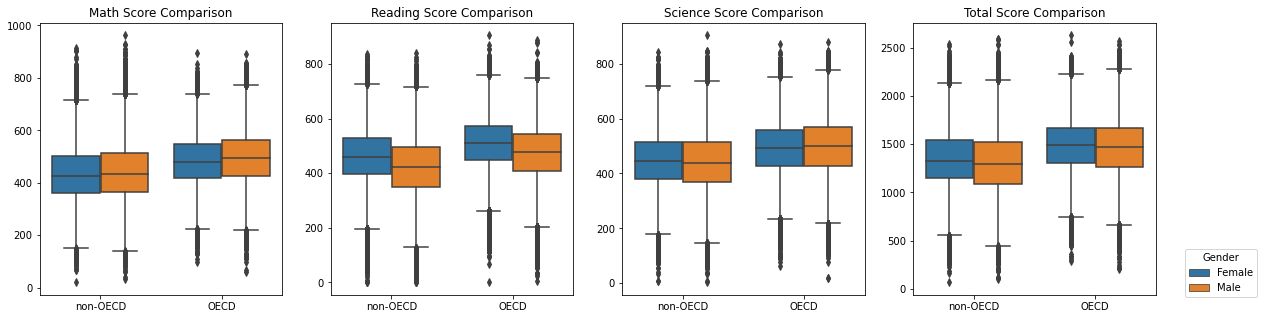

In [64]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 5])

# 1 row, 4 cols, subplot 1
ax1 = plt.subplot(1, 4, 1) 
sns.boxplot(data=df1, x='oecd', y='score_math', hue='gender')
ax1.set_title("Math Score Comparison");

# 1 row, 4 cols, subplot 2
ax2 = plt.subplot(1, 4, 2) 
sns.boxplot(data=df1, x='oecd', y='score_reading', hue='gender')
ax2.set_title("Reading Score Comparison");

# 1 row, 4 cols, subplot 3
ax3 = plt.subplot(1, 4, 3) 
sns.boxplot(data=df1, x='oecd', y='score_science', hue='gender')
ax3.set_title("Science Score Comparison");

# 1 row, 4 cols, subplot 4
ax4 = plt.subplot(1, 4, 4) 
sns.boxplot(data=df1, x='oecd', y='score_total', hue='gender')
ax4.set_title("Total Score Comparison");

# remove axis names and rename x-ticklabels
plots = [ax1, ax2, ax3, ax4]
for ax in plots:
    ax.set_xticklabels(('non-OECD', 'OECD'))
    ax.set(xlabel=None, ylabel=None)
    
# clean and position the legend
box = ax4.get_position()
ax4.set_position([box.x0, box.y0, box.width, box.height])
ax4.legend(title="Gender", loc='center left', bbox_to_anchor=(1.1, 0.08))
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()

plt.savefig('images/fig18.jpg', bbox_inches='tight')
plt.show();

The thing to look at in this chart is the colour difference for each pair of columns. We have assessed before the performance difference based on gender and OECD status. What we want to know here is if the difference by gender gets accentuated or not based on the OECD variable.

We can observe, very lightly, that female students from non-OECD countries perform better than female students from OECD countries when compared to male students. The science boxplot is probably the one where this difference is more obvious. While in OECD countries the median score from male students is higher, in non-OECD countries the median score from female students is higher. The interquartile ranges from both are also slightly shifted in these opposite directions.

### Multivariate Exploration Summary

I complete the exploratory visualization with 2 multivariate plots.

The first one shows a bivariate relationship that hadn't been tested in the previous section, between the OECD and parent's eduction variables while still showing clearly the correlation of these two with the third variable in the plot: test total scores.

The last two questions look at the one categorical variables that had shown less impact on the feature of interest in Bivariate Exploration: gender. By splitting these two into OECD and non-OECD countries (a variable that had shown a stronger relationship to scores), we could appreciate slight variations, which indicate these variables are still something to consider in further investigations and cannot be excluded for not being significant.

## 4. Conclusions

This report analyzes the potential impact of a series of variables referring to the student background in the results of PISA survey 2012.

The feature of interest of this investigation is the score obtained by the students in the PISA survey. The original dataset contained scores for 3 different disciplines, to which I added a column showing the total score, as a sum of the three. This allows me to simplify the plots in some questions (14 and 15), where I just compare the independent variables to the total score instead of faceting it by discipline as was done in other questions.

Regarding the background categories, the original dataset contains hundreds of them, and for the purpose of this project I select only a few of them. The goal of this investigation is to assess the potential impact these background variables could have in the observed test scores.

The Univariate exploration allows me to verify each variable separately and confirm the data has been stored properly. This way, I observe in the first section that the scores follow a normal distribution, and that both genders are represented equally. Also, I look at the distribution by country, noticing some of them have a larger representation in the survey. Half of the represented countries belong to OECD, but the number of students taking the test in OECD countries represent more than half (61%) of the survey entries.

The Bivariate exploration lets me compare each of the independent variables to the feature of interest. Some of these variables have a clearer impact on scores, like OECD membership and the highest level of education achieved by their parents. Other variables (gender and internet use at schools), seem to have less of an impact on the exam results.

The bivariate exploration also compares some independent variables to each other, to see if there is any correlation between them. We observe some correlation between OECD membership and internet Use, and also a very strong correlation between the level of education from each parent.

Finally, I use multivariate exploration to dig deeper into the two variables not showing a significant impact on scores: gender and internet use. I split both of them using the OECD variable, that shows a clear relationship to the feature of interest. By doing this, slight differences are observed for gender.

In conclusion, this investigation confirms that there are a number of different variables having a potential impact on the preparation of students for the future.